In [ ]:
import pandas as pd
import numpy as np

from pandas import DataFrame as df
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/Phoenix/Dacon_Data/COVID_19/TimeProvince.csv'
covid_province = pd.read_csv(path, encoding='utf-8', usecols=[0,2,3])
covid_province.head(10)

,date,province,confirmed
0,2020-01-20,서울,0
1,2020-01-20,부산,0
2,2020-01-20,대구,0
3,2020-01-20,인천,1
4,2020-01-20,광주,0
5,2020-01-20,대전,0
6,2020-01-20,울산,0
7,2020-01-20,세종,0
8,2020-01-20,경기도,0
9,2020-01-20,강원도,0


In [ ]:
# 6월 12일 확진자 12,002명으로 수정
covid_province.loc[144,'confirmed'] = 12002
# 1월 20일 월요일 ~ 6월 14일 일요일 데이터만 사용
covid_province = covid_province.loc[:2498]
covid_province.tail(10)

,date,province,confirmed
2489,2020-06-14,세종,47
2490,2020-06-14,경기도,1035
2491,2020-06-14,강원도,60
2492,2020-06-14,충청북도,61
2493,2020-06-14,충청남도,151
2494,2020-06-14,전라북도,21
2495,2020-06-14,전라남도,20
2496,2020-06-14,경상북도,1383
2497,2020-06-14,경상남도,127
2498,2020-06-14,제주도,15


In [ ]:
# 주별로 합치기 
weeks =[]
cnt = 0
for i in range(0,len(covid_province)):
  if (i)% 119==0:
    cnt=cnt+1
    weeks.append(cnt)
  else:
    weeks.append(cnt)  

print(weeks)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [ ]:
covid_province['weeks'] = weeks
covid_province.head(5)

,date,province,confirmed,weeks
0,2020-01-20,서울,0,1
1,2020-01-20,부산,0,1
2,2020-01-20,대구,0,1
3,2020-01-20,인천,1,1
4,2020-01-20,광주,0,1


In [ ]:
covid_province.set_index('weeks')

,date,province,confirmed
weeks,,,
1,2020-01-20,서울,0
1,2020-01-20,부산,0
1,2020-01-20,대구,0
1,2020-01-20,인천,1
1,2020-01-20,광주,0
...,...,...,...
21,2020-06-14,전라북도,21
21,2020-06-14,전라남도,20
21,2020-06-14,경상북도,1383


In [ ]:
covid_seoul =  covid_province[covid_province['province']=='서울']
covid_seoul.head()

,date,province,confirmed,weeks
0,2020-01-20,서울,0,1
17,2020-01-21,서울,0,1
34,2020-01-22,서울,0,1
51,2020-01-23,서울,0,1
68,2020-01-24,서울,0,1


In [ ]:
covid_seoul = covid_seoul.reset_index(drop=True)
covid_seoul.head()

,date,province,confirmed,weeks
0,2020-01-20,서울,0,1
1,2020-01-21,서울,0,1
2,2020-01-22,서울,0,1
3,2020-01-23,서울,0,1
4,2020-01-24,서울,0,1


In [ ]:
covid_seoul.set_index('weeks')

,date,province,confirmed
weeks,,,
1,2020-01-20,서울,0
1,2020-01-21,서울,0
1,2020-01-22,서울,0
1,2020-01-23,서울,0
1,2020-01-24,서울,0
...,...,...,...
21,2020-06-10,서울,1027
21,2020-06-11,서울,1048
21,2020-06-12,서울,1073


In [ ]:
# 서울 그 주의 누적확진자
confirmers = []
for i in range(6,len(covid_seoul),7):
  cnt=covid_seoul['confirmed'][i]
  confirmers.append(cnt)
print(confirmers)  

[0, 5, 14, 14, 31, 87, 120, 247, 324, 410, 552, 602, 624, 629, 637, 663, 735, 768, 861, 974, 1113]


In [ ]:
# 서울 누적 확진자 수
confirmers = []
for i in range(6,len(covid_seoul),7):
  cnt=covid_seoul['confirmed'][i]
  confirmers.append(cnt)
print(confirmers)  

[0, 5, 14, 14, 31, 87, 120, 247, 324, 410, 552, 602, 624, 629, 637, 663, 735, 768, 861, 974, 1113]


In [ ]:
covid_seoul_weekly = df(data=confirmers)
covid_seoul_weekly.head()

,0
0,0
1,5
2,14
3,14
4,31


In [ ]:
covid_seoul_weekly.columns = ['confirmers']

In [ ]:
covid_seoul_weekly.head()
weeks = list()
for i in range(1,22):
  weeks.append(i)

print(weeks) 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [ ]:
covid_seoul_weekly['weeks'] = weeks
covid_seoul_weekly

,confirmers,weeks
0,0,1
1,5,2
2,14,3
3,14,4
4,31,5
5,87,6
6,120,7
7,247,8
8,324,9
9,410,10


In [ ]:
covid_seoul_weekly.set_index('weeks')

,confirmers
weeks,
1,0
2,5
3,14
4,14
5,31
6,87
7,120
8,247
9,324


In [ ]:
weeks = list()
for i in range(1,22):
  weeks.append(i)

print(weeks)  

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [ ]:
covid_seoul_weekly = pd.DataFrame(confirmers,columns=['confirmed'],index=weeks)
covid_seoul_weekly

,confirmed
1,0
2,5
3,14
4,14
5,31
6,87
7,120
8,247
9,324
10,410


In [ ]:
covid_seoul_weekly.to_csv()

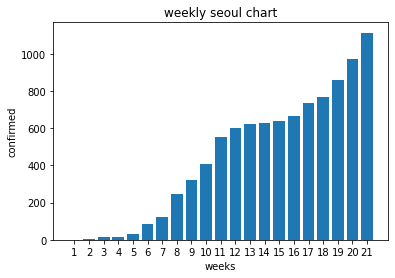

In [ ]:
plt.figure()
plt.bar(covid_seoul_weekly.index,covid_seoul_weekly['confirmed'])
plt.xlabel('weeks')
plt.ylabel('confirmed')
plt.title('weekly seoul chart')
plt.xticks(covid_seoul_weekly.index)
plt.show()